### [Seasonality Patterns in Time Series](https://medium.com/data-science/how-to-find-seasonality-patterns-in-time-series-c3b9f11e89c6)

> Using Fourier Transforms to detect seasonal components

> [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

In [1]:
!pip install -q numpy pandas matplotlib scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')

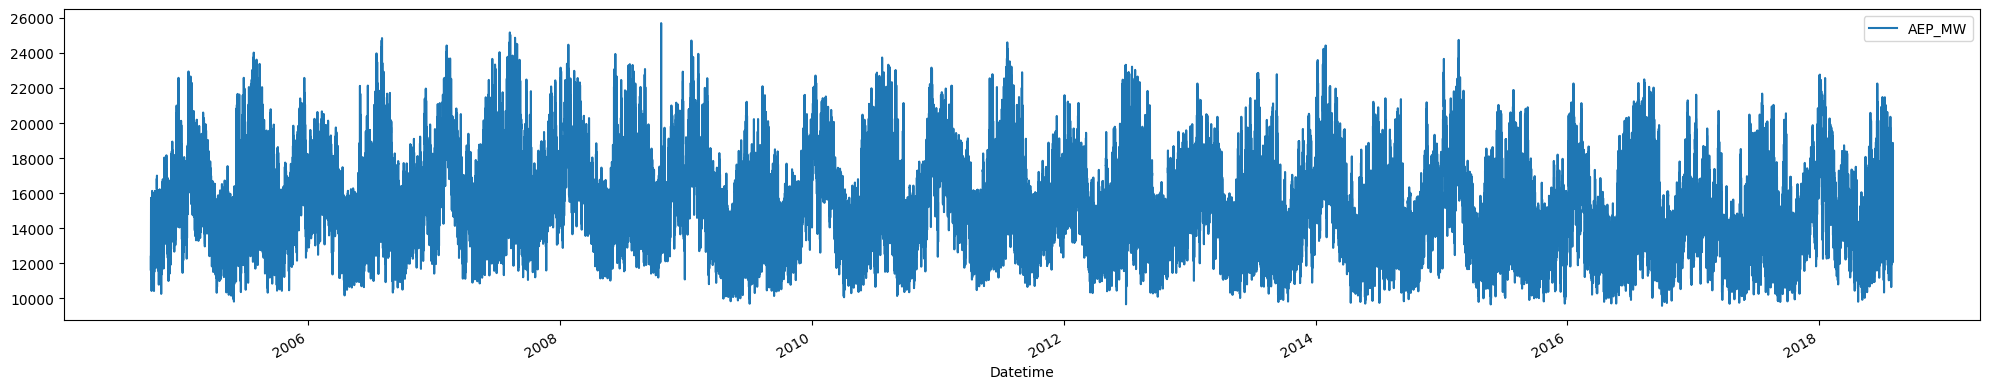

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ds_url = 'https://raw.githubusercontent.com/khsieh18/Time-Series/refs/heads/master/AEP_hourly.csv'
df = pd.read_csv(ds_url, index_col=0) 
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

fig, ax = plt.subplots(figsize=(20,4))
df.plot(ax=ax)
plt.tight_layout()
plt.show()

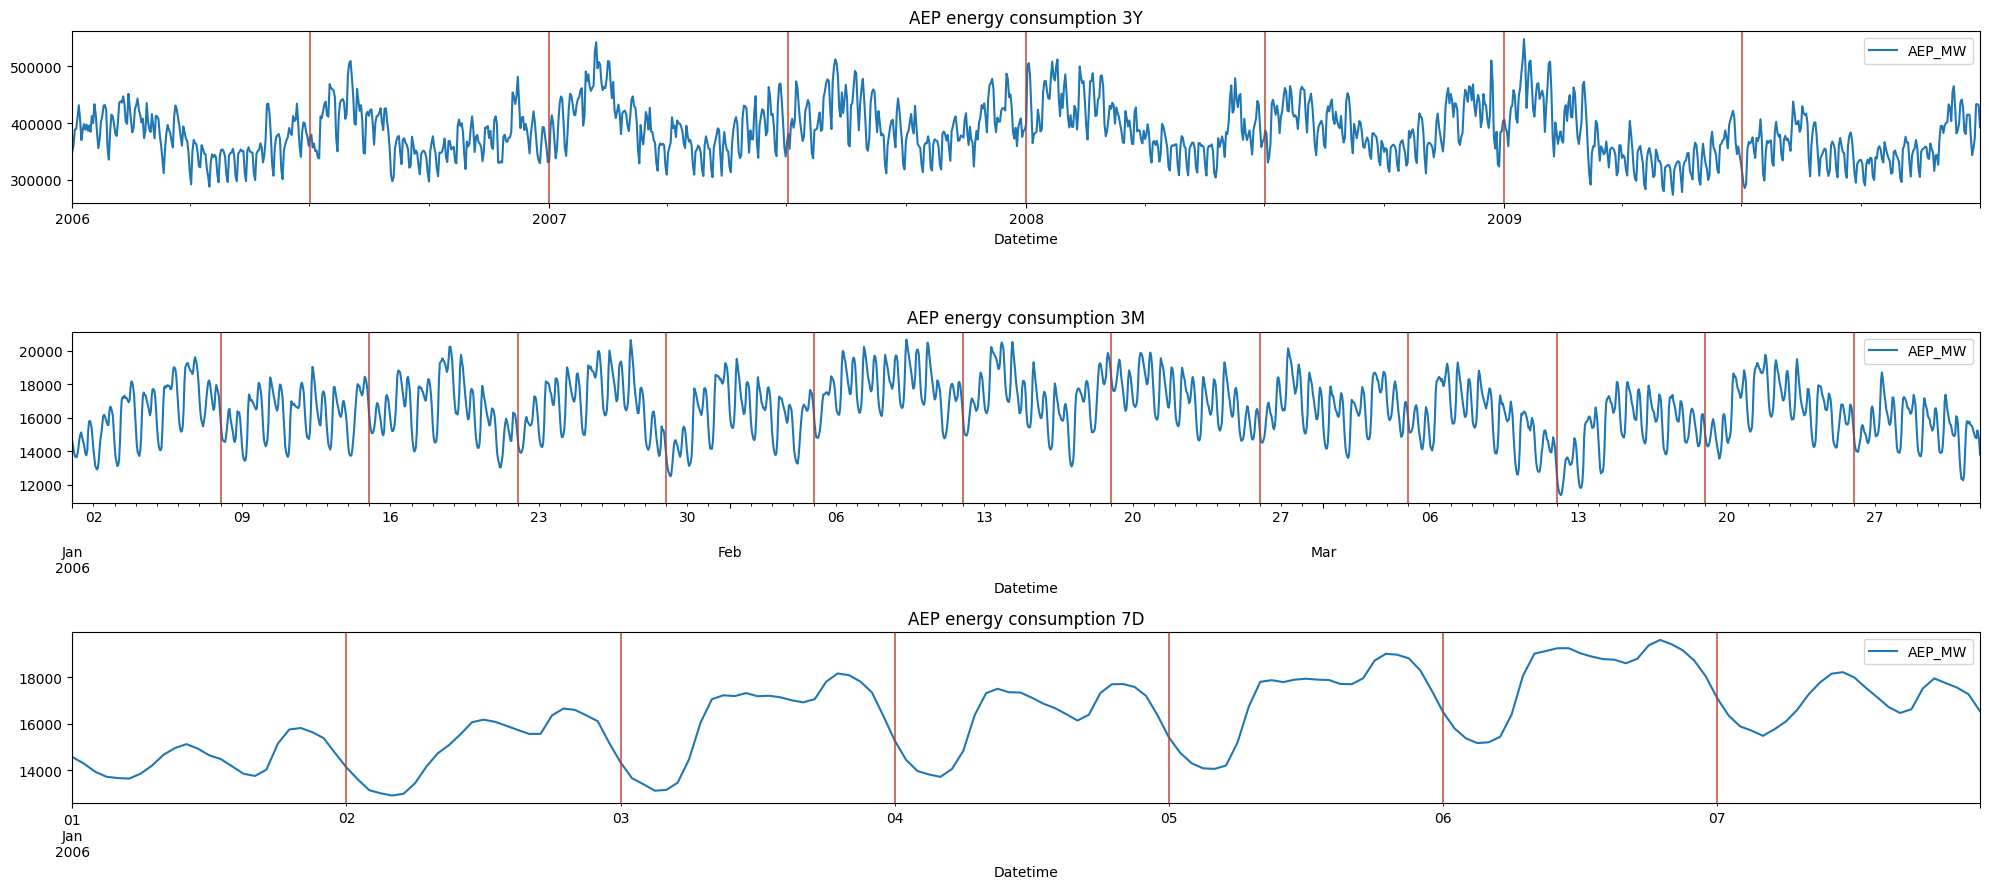

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(20,9))

df_3y = df[(df.index >= '2006-01-01') & (df.index < '2010-01-01')]
df_3M = df[(df.index >= '2006-01-01') & (df.index < '2006-04-01')]
df_7d = df[(df.index >= '2006-01-01') & (df.index < '2006-01-08')]

ax[0].set_title('AEP energy consumption 3Y')
df_3y[['AEP_MW']].groupby(pd.Grouper(freq = 'D')).sum().plot(ax=ax[0])
for date in df_3y[[True if x % (24 * 365.25 / 2) == 0 else False for x in range(len(df_3y))]].index.tolist():
    ax[0].axvline(date, color = '#b13e2b', alpha = 0.7)
    
ax[1].set_title('AEP energy consumption 3M')
df_3M[['AEP_MW']].plot(ax=ax[1])
for date in df_3M[[True if x % (24 * 7) == 0 else False for x in range(len(df_3M))]].index.tolist():
    ax[1].axvline(date, color = '#b13e2b', alpha = 0.7)
                                                                            
ax[2].set_title('AEP energy consumption 7D')
df_7d[['AEP_MW']].plot(ax=ax[2])
for date in df_7d[[True if x % 24 == 0 else False for x in range(len(df_7d))]].index.tolist():
    ax[2].axvline(date, color = '#b13e2b', alpha = 0.7)

plt.tight_layout()
plt.show()

#### Fourier Transform

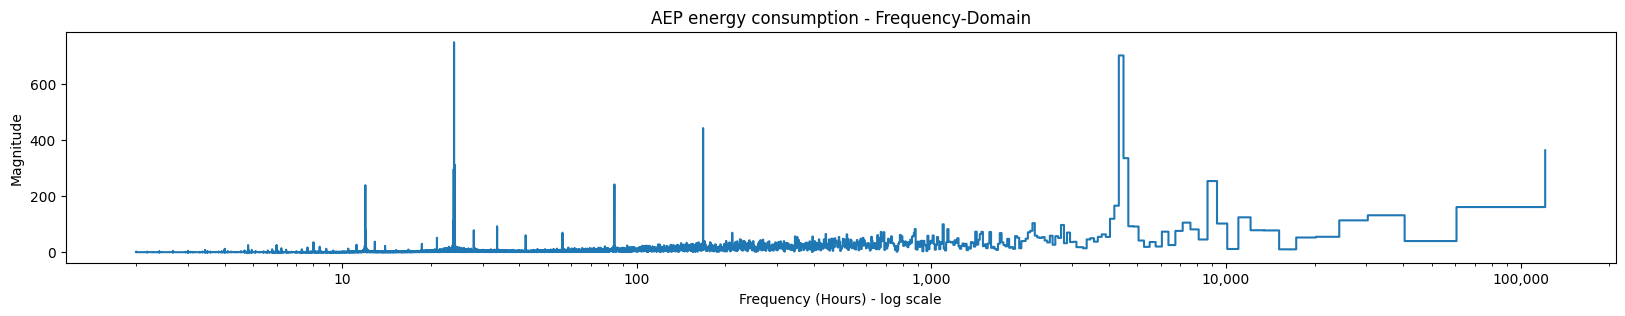

In [5]:
from numpy import fft
import numpy as np

X = fft.fft(df['AEP_MW'])
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies >= 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('AEP energy consumption - Frequency-Domain')
ax.set_xlabel('Frequency (Hours) - log scale')
ax.set_ylabel('Magnitude')
plt.show()

#### Periodogram

The periodogram is a frequency-domain representation of the power spectral density (PSD) of a signal. While the Fourier Transform tells us which frequencies are present in a signal, the periodogram quantifies the power (or intensity) of those frequencies. This passage is usefull as it reduces the noise of less important frequencies.

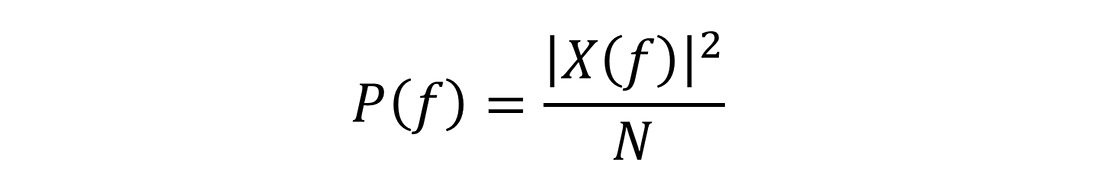

Where:

- `P(f)` is the power spectral density (PSD) at frequency `f`,
- `X(f)` is the Fourier Transform of the signal,
- `N` is the total number of samples.

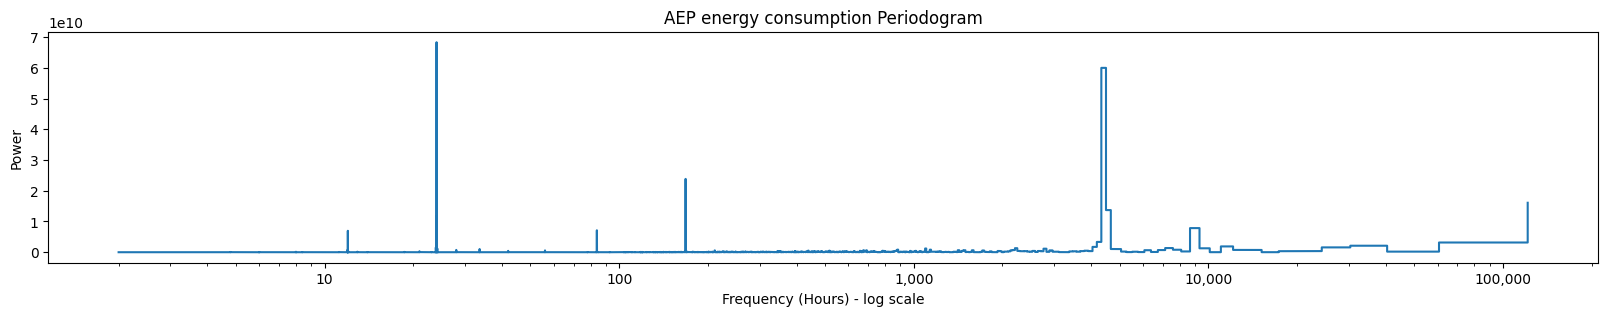

In [6]:
power_spectrum = np.abs(X)**2 / N # Power at each frequency

fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], power_spectrum[mask])
ax.set_title('AEP energy consumption Periodogram')
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('Frequency (Hours) - log scale')
plt.ylabel('Power')
plt.show()

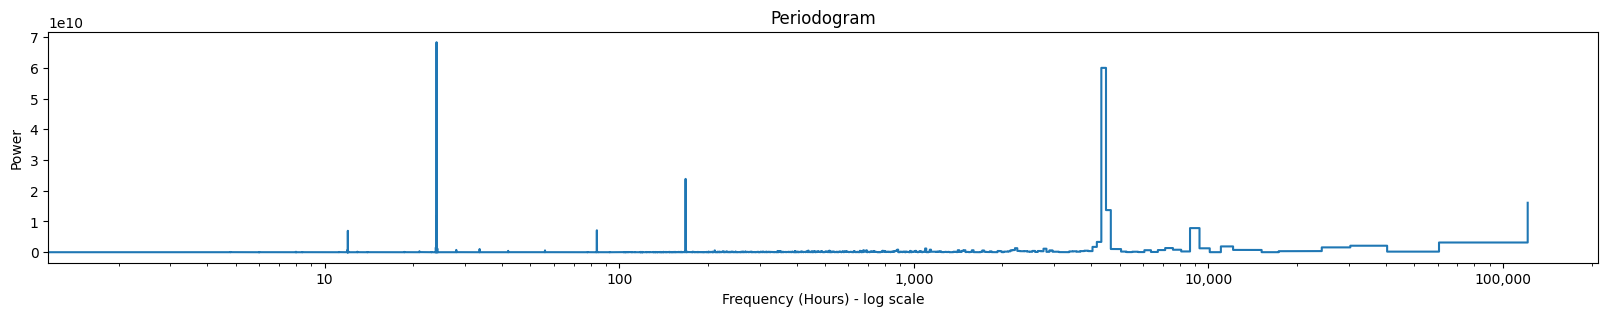

In [7]:
from scipy.signal import periodogram

frequencies, power_spectrum = periodogram(df['AEP_MW'], return_onesided=False)
periods = 1 / frequencies

fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods, power_spectrum)
ax.set_title('Periodogram')
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('Frequency (Hours) - log scale')
plt.ylabel('Power')
plt.show()